In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [17]:
# Load .env enviroment variables
load_dotenv('classkeys.env')

True

In [18]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [19]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [20]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()
# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()

In [21]:
# Compute current value of my crpto
my_btc_value = response_btc_data['data']['1']['quotes']['USD']['price']
my_btc_value

61391.0

In [22]:
# Compute current value of my crpto
my_eth_value = response_eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value

4308.92

In [23]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61391.00
The current value of your 5.3 ETH is $4308.92


In [24]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [25]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [35]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-29", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-29 00:00:00-04:00  114.35  114.78  114.35  114.62  7051614  455.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-29 00:00:00-04:00  459.56  455.56  459.22  58813207

In [36]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.62
Current SPY closing price: $459.22


In [37]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22961.00
The current value of your 200 AGG shares is $22924.00


In [49]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings

,amount
crypto,65699.92
shares,45885.00


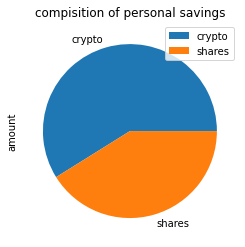

In [50]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title = "compisition of personal savings");

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


In [52]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-29', tz='America/New_York').isoformat()

In [53]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-06-10 00:00:00-04:00  422.96  424.63  421.55  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.82  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.10  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.46  423.54  424.50  42885806  
2021-06-16 00:00:00-04:00  424.63  424.87  419.92  422.12  73638324

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Print the simulation input data
MC_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-06-10 00:00:00-04:00          NaN  422.96  424.63  421.55  423.58   
2021-06-11 00:00:00-04:00    -0.000520  424.19  424.42  422.82  424.31   
2021-06-14 00:00:00-04:00    -0.002343  424.43  425.29  423.10  425.29   
2021-06-15 00:00:00-04:00     0.000217  425.43  425.46  423.54  424.50   
2021-06-16 00:00:00-04:00    -0.003174  424.63  424.87  419.92  422.12   

                                                  
                             volume daily_return  
time                                              
2021-06-10 00:00:00-04:00  43577329          NaN  
2021-06-11 00:00:00-04:00  37018077     0.001723  
2021-06-14 00:00:00-04:00  33128340     0.002310  
2021-06-15 00:00:00-04:00  42885806    -0.001858  
2021-06-16 00:00:00-04:00  73638324    -0.005607

In [55]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\buchh\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994336,1.001806,0.999918,0.999386,1.004931,0.995626,0.999803,1.004031,0.995691,0.995536,...,1.003326,0.998603,0.994116,0.997958,0.993684,0.999209,1.001971,0.999089,1.001955,1.000275
2,0.989699,0.999690,0.999786,0.998466,0.998628,0.998382,1.000453,0.999447,0.998721,0.997349,...,1.004502,0.996358,1.000607,0.995914,0.995993,1.002062,1.001679,0.997598,0.998677,1.003150
3,0.995115,1.006133,0.999564,0.998542,0.992465,1.000833,1.001837,1.001536,0.994552,0.999878,...,1.005967,1.000958,1.003250,0.998261,0.998780,1.005219,1.003220,1.000942,1.000412,0.994655
4,0.994984,1.011793,1.003070,1.003882,1.000008,1.006910,1.003701,1.000156,0.990012,0.996796,...,1.009855,1.003187,1.009253,0.992541,0.996100,0.999960,1.003687,1.003291,1.001277,0.994396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,42.913578,38.050354,26.230708,44.252814,25.304830,18.185877,84.969168,70.799852,32.301058,40.283824,...,38.111392,23.577097,41.122618,44.174978,31.584222,43.269641,54.588121,17.431192,46.601642,46.690224
7557,42.450741,38.279341,26.023278,43.937301,25.274764,18.139968,84.860607,70.981502,32.337440,40.196398,...,37.882558,23.546950,41.270482,43.946087,31.531308,43.124147,54.326804,17.625829,46.563447,46.706910
7558,42.535077,38.373635,26.192383,44.033440,25.335836,18.169375,84.925751,70.699458,32.401632,39.871829,...,38.183276,23.545911,41.213237,43.856257,31.595034,43.386371,54.351526,17.662929,46.342114,46.936947
7559,42.561865,38.422501,26.282645,43.758854,25.458883,18.166707,85.654289,71.035558,32.461772,39.797906,...,38.425552,23.532038,41.326414,43.966170,31.564312,43.461125,54.329278,17.830021,46.617445,46.979930


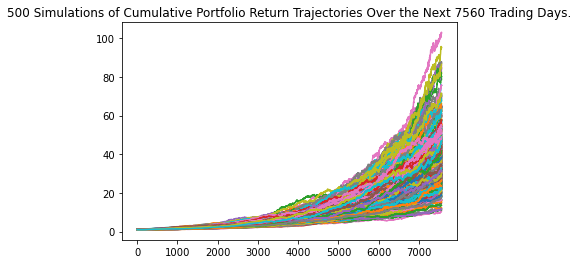

In [56]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation();

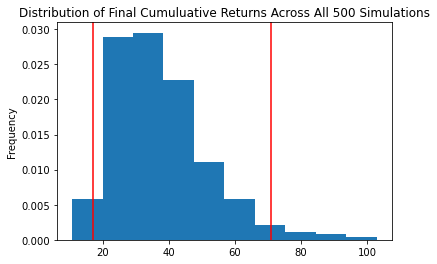

In [57]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution();

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             37.343935
std              14.258347
min              10.662047
25%              27.079815
50%              35.092359
75%              44.068109
max             102.842465
95% CI Lower     17.074252
95% CI Upper     70.896933
Name: 7560, dtype: float64


In [59]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $341485.04 and $1417938.67


In [60]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $512227.56 and $2126908.0
